In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Study Data

In [82]:
cliente = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
intervalo = [10,2,13,7,2,8,8,8,10,9,1,14,14,1,10,9,9,9,8,14]
duracao = [5,5,3,3,6,7,6,8,2,5,8,8,8,3,4,3,3,4,5,5]

clientes= {'cliente':cliente,'intervalo_chegada':intervalo,'tempo_atendimento':duracao}
data = pd.DataFrame(clientes)




C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tempo_atendimento', ylabel='Density'>

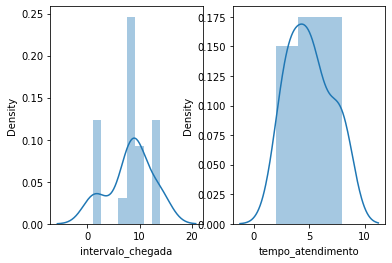

In [83]:
plt.subplot(1,2,1)
sns.distplot(data['intervalo_chegada'])

plt.subplot(1,2,2)
sns.distplot(data['tempo_atendimento'])

# Cap. 2 

**FIFO Queue

**1 server

In [86]:
def discrete_sim_cap2(data,tempo,verbose=False):
    servidor1 = []
    fila = []
    chegada = []
    tempo_total_em_espera = 0
    
    
    
    #criando uma linha do tempo no dataframe proposto
    for i in range(len(data)):
    
        if i == 0:
            data.loc[i,'linha_do_tempo'] = data.loc[i,'intervalo_chegada']
        else:
            j = i-1
            data.loc[i,'linha_do_tempo'] = data.loc[i-1,'linha_do_tempo'] + data.loc[i,'intervalo_chegada']

    data['linha_do_tempo'] = data['linha_do_tempo'].astype('int64')
    
        
    #organizando os dados obtidos em listas para verificacao
    tempos_de_chegada = list(data['linha_do_tempo'])
    clientes = list(data['cliente'])
    print('clientes = {}'.format(clientes))
   
    #montando a primeira chegada antes de iterarmos a linha do tempo
    k=0 #k como variavel para identificarmos os clientes
    fim_atendimento = data.loc[0,'intervalo_chegada'] + data.loc[0,'tempo_atendimento']
    
    print(data)
    
    #linha do tempo da simulação discreta 
    for i in range(1,300): ###valores altos p range, sem muitas preocupações pois o código so busca dados até o último
                           ###instante de utilização do servidor
        t=i
        if verbose==True:
            print('\n -------- tempo = {}s ----------'.format(t))
        
        #primeiro atendimento irá ser no primeiro tempo de chegada do cliente, ou seja, k=0
        if k<len(tempos_de_chegada):
            inicio_atendimento = tempos_de_chegada[k]
            if verbose == True:
                if t == inicio_atendimento:
                    print('atenderemos alguem agora '.format(tempos_de_chegada[k] - t))
                    
                else:
                    print('atenderemos alguem em {} horas'.format(tempos_de_chegada[k] - t))
                
                
            
        
        
        #começar os atendimentos assim que a linha do tempo encontrar a primeira chegada (proposto antes da iteração)
        if t == inicio_atendimento:
            #verificacao pra ver se chegam + de 1 cliente no servidor!
            chegada= list(data.loc[data['linha_do_tempo']==inicio_atendimento,'cliente'])
            clientes_que_chegam = len(chegada)
            if verbose == True:
                print('chegou uma quantidade de {} clientes'.format(clientes_que_chegam))
            if clientes_que_chegam == 1:
                
                print('clientes que chegam = {}'.format(clientes_que_chegam))
                
                if verbose==True:
                    print('k eh {}'.format(k))
                    print('o cliente {} chegou ao porto!'.format(clientes[k]))
                if bool(servidor1) == False:
                    print('k eh : {}'.format(k))
                    servidor1.append(clientes[k]) #o cliente k entra no servidor se o mesmo estiver vazio
                    fim_atendimento = t + data.loc[k,'tempo_atendimento'] #setados o fim do atendimento
                    if verbose==True:
                        print('valor k eh: {}'.format(k))
                        print('o cliente {} foi adicionado ao servidor!'.format(clientes[k]))
                        print('seu atendimento esta previsto para acabar as {} horas'.format(fim_atendimento))
                    k = k+1 # se caso adicionado, somamos K para observar o próximo cliente
                    
                  
                else:
                    #caso o servidor já estiver em uso, o cliente entrará em fila
                    fila.append(clientes[k])
                    if verbose ==True:
                        print('o cliente {} foi adicionado na fila'.format(clientes[k]))
                    k = k+1 #se caso adicionado na fila, somamos K para observar o próx. cliente 
                
            
               
            else:
                #se chegam + de 1 cliente na mesma hora, e o sv estiver livre, adicionamos o primeiro a chegar (FIFO)
                if bool(servidor1) == False:
                    k = k + len(chegada)-1
                    servidor1.append(chegada[0]) #o cliente k entra no servidor se o mesmo estiver vazio
                    fim_atendimento = t + data.loc[data['cliente']==chegada[0],'tempo_atendimento'] #setados o fim do atendimento
                    chegada.pop(0)
                    fila = chegada
                    if verbose==True:
                        print('o cliente {} foi adicionado ao servidor!'.format(chegada[0]))
                        print('seu atendimento esta previsto para acabar as {} horas'.format(fim_atendimento))
                        
                        
                #se chegam + de 1 clientes na mesma hora, e o servidor estiver em uso, todos irão pra fila.  
                else:
                    for i in range(len(chegada)):
                        fila.append(chegada[i])
                        print('valor de k eh: {}'.format(k))
                        print('o cliente {} foi adicionado a fila '.format(chegada[i]))
                        k = k + len(chegada)-1
                     
                
                
                
            
                
                
                
        #assim que terminarmos um atendimento seguimos com as seguintes opçoes 
        if t == fim_atendimento:
            servidor1 = []
            
            #se temos clientes em fila, então este será o próximo a ser atendido no servidor, logo dropamos ele da fila
            if bool(fila) == True: 
                servidor1.append(fila[0])
                fim_atendimento = t+data.loc[fila[0],'tempo_atendimento']
                
                if verbose==True:
                    print('o valor de k eh: {}'.format(k))
                    print('o cliente {} que estava na fila, foi adicionado ao servidor!'.format(fila[0]))
                    print('a previsao para o término do atendimento atual eh as {} horas'.format(fim_atendimento))
                fila.pop(0)
                
                
                
        #somatório para a observação do tempo total que clientes ficam em fila       
        if bool(fila) == True:
            tempo_total_em_espera = tempo_total_em_espera + 1
        
        
        
                
                
        
        if verbose==True:
            if bool(servidor1) == True:
                print('o cliente {} esta em atendimento'.format(servidor1[0]))
            else:
                print('o servidor esta vazio!')
            if bool(fila) == True:
                print('cliente {} esta na fila'.format(fila[0]))
        
            print('valor de k = {}'.format(k))
            if k<len(clientes):
                print('o cliente {} chegara ao porto'.format(clientes[k]))
                
        
        #conclusoes
       
    
    IC = np.mean(list(data['intervalo_chegada'])) #média dos intervalos de chegada 
    TA = np.mean(list(data['tempo_atendimento'])) #média dos atendimentos
    
    TMF =  tempo_total_em_espera / len(data) #tempo médio em que os clientes ficam em fila
    NMF = np.round(tempo_total_em_espera / fim_atendimento,3) #numero de clientes que ficam em fila
    
    if tempo == 'horas':
        lam = np.round(24 / IC,2) # fluxo de chegada por dia para caso os dados forem em horas
        mi = np.round(24 / TA,2) # capacidade de atendimento por dia caso os dados forem em horas
        return pd.DataFrame({'Intervalo_Medio_Chegada':'{}h ou {} clientes por dia'.format(IC,lam),
                         'Duracao_Media_Atendimento':'{}h ou {} clientes por dia'.format(TA,mi),
                         'tempo_medio_fila':'{} horas de espera'.format(TMF),
                         'numero_medio_fila': '{} clientes'.format(NMF)},index=[0])
    
    elif tempo == 'minutos':
        lam=np.round(60/IC,2)
        mi = np.round(60 / TA,2)
        return pd.DataFrame({'Intervalo_Medio_Chegada':'{}min ou {} clientes por hora'.format(IC,lam),
                         'Duracao_Media_Atendimento':'{}min ou {} clientes por hora'.format(TA,mi),
                         'tempo_medio_fila':'{} minutos de espera'.format(TMF),
                         'numero_medio_fila': '{} clientes'.format(NMF)},index=[0])
    else: #caso os dados forem em segundos
        lam=np.round(60/IC,2)
        mi = np.round(60 / TA,2)
        return pd.DataFrame({'Intervalo_Medio_Chegada':'{}s ou {} clientes por minuto'.format(IC,lam),
                         'Duracao_Media_Atendimento':'{}s ou {} clientes por minuto'.format(TA,mi),
                         'tempo_medio_fila':'{} segundos de espera'.format(TMF) ,
                         'numero_medio_fila': '{} clientes'.format(NMF)},index=[0])
        
        
    
   
        
    
        
        
    
        
            
        
        
        

In [87]:
discrete_sim_cap2(data,tempo='horas',verbose=True)

clientes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    cliente  intervalo_chegada  tempo_atendimento  linha_do_tempo
0         1                 10                  5              10
1         2                  2                  5              12
2         3                 13                  3              25
3         4                  7                  3              32
4         5                  2                  6              34
5         6                  8                  7              42
6         7                  8                  6              50
7         8                  8                  8              58
8         9                 10                  2              68
9        10                  9                  5              77
10       11                  1                  8              78
11       12                 14                  8              92
12       13                 14                  8          

,Intervalo_Medio_Chegada,Duracao_Media_Atendimento,tempo_medio_fila,numero_medio_fila
0,8.3h ou 2.89 clientes por dia,5.05h ou 4.75 clientes por dia,0.8 horas de espera,0.094 clientes
